In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. Il file weather.csv contiene informazioni sul meteo di alcune città australiane. Caricare il suo contenuto in un dataframe.

   Quante righe e quante colonne ci sono nel dataset?

   Ci sono valori mancanti?

In [47]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2025/04_data_visualization/weather.csv', sep=';')
rows_number = df.count().max()
df.isna().value_counts()

,,,,,,,,,,,,,,,,,count
Month,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,14468


2. Aggiungere al dataset:

- una nuova colonna "temp_diff" con la differenza in valore assoluto tra i valori di temperatura alle 9 del mattino e le 3 del pomeriggio

- una nuova colonna "hum_diff" con la differenza in valore assoluto tra i valori di umidità alle 9 del mattino e le 3 del pomeriggio

In [48]:
df.head()

df['temp_diff'] = abs(df['Temp3pm'] - df['Temp9am'])
df['hum_diff'] = abs(df['Humidity3pm'] - df['Humidity9am'])


3. Selezionare soltanto le righe in cui "temp_diff" è maggiore di 10 e "hum_diff" è maggiore di 20. Qual è la location in cui si verifica più spesso questa elevata escursione termica (ovvero la location con il maggior numero di righe nella selezione)?

In [49]:
df_filtered = df.query("temp_diff > 10 and hum_diff > 20")
top_location = (
    df_filtered
      .groupby('Location')
      .size()
      .sort_values(ascending=False)
      .head(1)
)
print(top_location.index[0])

Richmond


4. Quante location sono presenti nel file?

In [50]:
df['Location'].nunique()

42

5. Trasformare i valori della colonna "RainToday" convertendo "yes" in 1 e "no" in 0. Utilizzando il metodo groupby calcolare per ogni location il numero di giorni di pioggia.

In [57]:
#df['RainToday'] = df['RainToday'].map(lambda rain : 1 if rain == 'Yes' else 0)
df['RainToday'] = df['RainToday'].replace({'Yes': 1, 'No': 0}).astype(int)
number_rainy_days = (
    df.groupby('Location')['RainToday']
    .sum()
)
print(number_rainy_days)


Location
Adelaide             90
Albury               88
AliceSprings         39
BadgerysCreek        57
Ballarat            110
Bendigo              90
Brisbane             75
Cairns               88
Canberra             81
Cobar                48
CoffsHarbour         80
Dartmoor            126
Darwin               95
GoldCoast            65
Hobart               94
Melbourne            79
MelbourneAirport     96
Mildura              46
Moree                45
MountGambier        123
Nhil                 74
NorahHead            82
NorfolkIsland       122
Nuriootpa            89
PearceRAAF           77
Perth                91
PerthAirport         79
Portland            145
Richmond             61
Sale                 73
Sydney               83
SydneyAirport        84
Townsville           54
Tuggeranong          84
Uluru                37
WaggaWagga           86
Walpole             130
Watsonia             91
Williamtown          70
Witchcliffe         119
Wollongong           68
Woomera

6. Creare una tabella pivot in cui per ogni location (sulle righe) e per ogni mese (sulle colonne) sia calcolata la temperatura massima media.

In [70]:
df.head()
pivot_table = (
    df.groupby(['Location', 'Month'])['MaxTemp']
      .mean()
      .unstack()
)
pivot_table2 = (
    df.pivot_table(index='Location', columns='Month', values= 'MaxTemp', aggfunc='mean')
)
pivot_table2

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,31.190323,29.289655,28.641935,24.826667,19.793548,16.043333,15.283871,17.658065,17.420000,20.993548,24.706667,28.658065
Albury,31.487097,32.441379,30.790323,25.810000,18.077419,13.423333,13.280645,15.248387,16.823333,19.667742,25.586667,30.500000
AliceSprings,34.858065,37.179310,35.148387,31.824138,25.370000,20.690000,21.080000,22.638710,24.620000,30.516667,35.383333,34.532000
BadgerysCreek,28.792857,30.251724,29.412903,26.246667,23.225806,18.106667,18.483871,18.716129,21.093103,24.477419,29.734483,32.369231
Ballarat,26.934483,26.288889,24.796667,20.093333,14.925806,10.551724,10.151613,11.803226,13.190000,15.556667,19.276667,24.596667
Bendigo,30.100000,30.881481,28.996774,23.186667,17.045161,12.746667,12.812903,14.251613,15.520000,18.925806,24.383333,28.664516
Brisbane,30.374074,32.303846,29.929032,28.783333,26.983871,21.526667,22.464516,23.153333,24.880000,27.083871,30.388889,30.058065
Cairns,32.116667,33.248276,31.761290,30.431034,28.636842,27.413333,26.977419,26.600000,28.300000,30.100000,31.939130,32.150000
Canberra,28.541935,29.306897,27.690323,23.880000,17.326667,13.013333,12.741935,14.258065,15.793333,18.477419,25.425926,28.716667


7. Visualizzare in un unico grafico la distribuzione dei valori di temperatura massima nel mese di maggio (5) e dicembre (12).

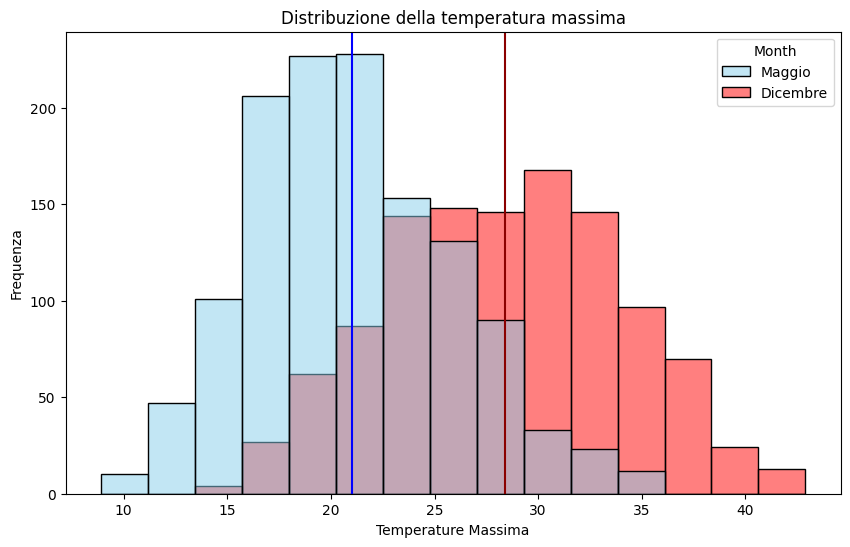

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df[df['Month'].isin([5,12])].copy()
data['Month'] = data['Month'].map({5: 'Maggio', 12: 'Dicembre'})

plt.figure(figsize=(10, 6))
plt.xlabel('Temperature Massima')
plt.ylabel('Frequenza')
plt.title('Distribuzione della temperatura massima')
sns.histplot(
    data=data,
    x='MaxTemp',
    hue='Month',
    palette = {'Maggio': 'skyblue', 'Dicembre': 'red'},
    bins=15
)

mean_maggio = data[data['Month'] == 'Maggio']['MaxTemp'].mean()
mean_dicembre = data[data['Month'] == 'Dicembre']['MaxTemp'].mean()
plt.axvline(mean_maggio, color='blue')
plt.axvline(mean_dicembre, color='darkred')

plt.show()

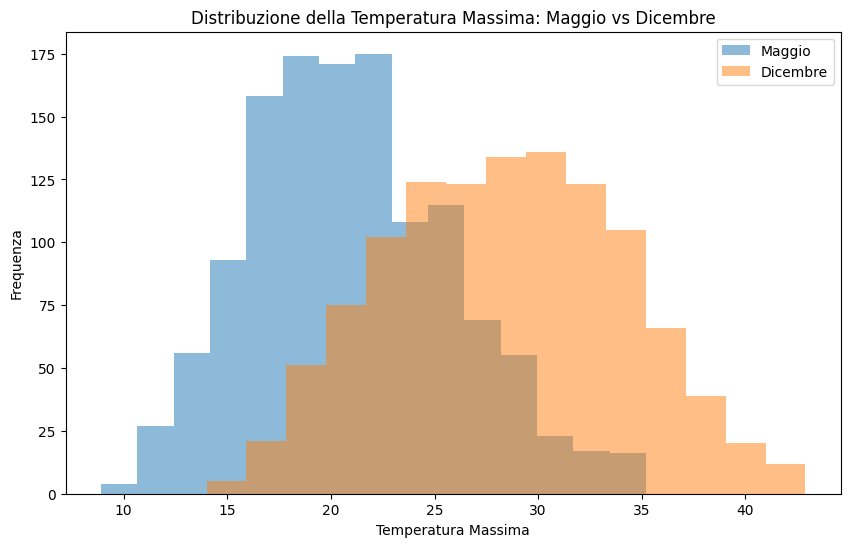

In [85]:
import matplotlib.pyplot as plt

# seleziono solo maggio e dicembre
df_subset = df[df['Month'].isin([5, 12])]

# grafico distribuzione con histogrammi affiancati
plt.figure(figsize=(10,6))
plt.hist(df_subset[df_subset['Month']==5]['MaxTemp'], bins=15, alpha=0.5, label='Maggio')
plt.hist(df_subset[df_subset['Month']==12]['MaxTemp'], bins=15, alpha=0.5, label='Dicembre')
plt.xlabel('Temperatura Massima')
plt.ylabel('Frequenza')
plt.title('Distribuzione della Temperatura Massima: Maggio vs Dicembre')
plt.legend()
plt.show()

8. Visualizzare in uno scatterplot la relazione tra i valori di pressione e i valori di umidità (fare 2 plot distinti nella stessa figura, uno per i valori 9am e un altro per i valori 3pm). Colorare i punti di due colori diversi in base ai valori di RainToday.

In [142]:
df.loc[df['Pressure3pm'] <= 0, 'Pressure3pm'] = pd.NA


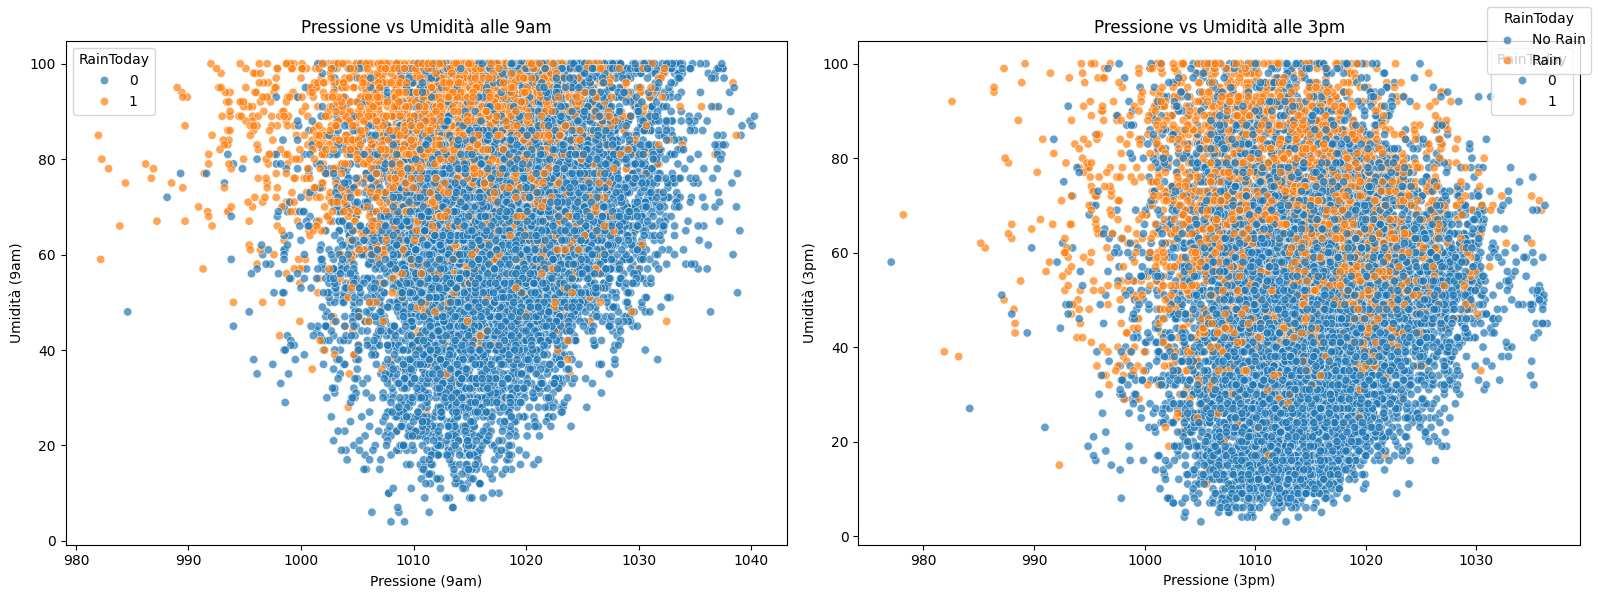

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.scatterplot(
    data=df,
    x='Pressure9am',
    y='Humidity9am',
    hue='RainToday',
    ax=axes[0],
    legend=True,
    alpha=0.7
)

axes[0].set_title('Pressione vs Umidità alle 9am')
axes[0].set_xlabel('Pressione (9am)')
axes[0].set_ylabel('Umidità (9am)')

sns.scatterplot(
    data=df,
    x='Pressure3pm',
    y='Humidity3pm',
    hue='RainToday',
    ax=axes[1],
    legend=True,
    alpha=0.7
)

axes[1].set_title('Pressione vs Umidità alle 3pm')
axes[1].set_xlabel('Pressione (3pm)')
axes[1].set_ylabel('Umidità (3pm)')

handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles, ['No Rain', 'Rain'], title='RainToday', loc='upper right')

plt.tight_layout()
plt.show()
